In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import cvxopt

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import glob

# Importing drive method from colab for accessing google drive
from google.colab import drive
from google.colab import files

In [3]:
# Mounting drive
# This will require authentication : Follow the steps as guided
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
import os
os.chdir("drive/My Drive/ISML")

#Train Data

In [5]:
#read training data
train_file = "data/train.csv"
df = pd.read_csv(train_file,header=None)
print(df)

      0     1     2     3     4     5    ...   195   196   197   198   199   200
0     0.0 -0.36 -0.91 -0.99 -0.57 -1.38  ...  1.75  1.58  0.12  0.30  2.44 -1.26
1     1.0 -1.40 -1.90  0.09  0.29 -0.30  ... -0.02 -0.35 -0.27 -0.20 -0.92 -0.46
2     1.0 -0.43  1.45 -0.68 -1.58  0.32  ...  0.74  0.88  1.37  0.12  0.01 -0.56
3     1.0 -0.76  0.30 -0.57 -0.33 -1.50  ... -0.24 -0.69  1.31 -0.18 -1.54 -1.70
4     0.0 -0.76  1.36  0.00 -1.44 -1.27  ... -0.14  0.04  0.33  1.20 -0.81 -1.16
...   ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
8495  1.0 -1.55 -0.02  0.67  0.17 -2.17  ... -0.65  0.16 -2.17  0.39 -2.48  0.36
8496  0.0  0.53 -0.74  0.06 -0.76  0.20  ... -0.60 -0.64  0.03 -1.04  0.01 -1.04
8497  1.0  1.18  0.78 -0.02  1.25 -0.85  ...  1.06  0.36 -0.40 -0.63  0.29 -0.96
8498  1.0 -0.55  1.16 -0.56  1.58 -0.06  ... -0.11  0.42 -0.30  2.97 -2.66 -1.90
8499  0.0  0.80 -0.97 -0.15 -0.01 -1.57  ... -0.32  0.35  0.44 -1.58  0.35  1.06

[8500 rows x 201 columns]


In [6]:
#transfer labels to either -1 or +1
df.iloc[:,0].replace(0.0,-1.0,inplace=True)
print(df)

      0     1     2     3     4     5    ...   195   196   197   198   199   200
0    -1.0 -0.36 -0.91 -0.99 -0.57 -1.38  ...  1.75  1.58  0.12  0.30  2.44 -1.26
1     1.0 -1.40 -1.90  0.09  0.29 -0.30  ... -0.02 -0.35 -0.27 -0.20 -0.92 -0.46
2     1.0 -0.43  1.45 -0.68 -1.58  0.32  ...  0.74  0.88  1.37  0.12  0.01 -0.56
3     1.0 -0.76  0.30 -0.57 -0.33 -1.50  ... -0.24 -0.69  1.31 -0.18 -1.54 -1.70
4    -1.0 -0.76  1.36  0.00 -1.44 -1.27  ... -0.14  0.04  0.33  1.20 -0.81 -1.16
...   ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
8495  1.0 -1.55 -0.02  0.67  0.17 -2.17  ... -0.65  0.16 -2.17  0.39 -2.48  0.36
8496 -1.0  0.53 -0.74  0.06 -0.76  0.20  ... -0.60 -0.64  0.03 -1.04  0.01 -1.04
8497  1.0  1.18  0.78 -0.02  1.25 -0.85  ...  1.06  0.36 -0.40 -0.63  0.29 -0.96
8498  1.0 -0.55  1.16 -0.56  1.58 -0.06  ... -0.11  0.42 -0.30  2.97 -2.66 -1.90
8499 -1.0  0.80 -0.97 -0.15 -0.01 -1.57  ... -0.32  0.35  0.44 -1.58  0.35  1.06

[8500 rows x 201 columns]


In [7]:
y_negative_pd = df.iloc[:,0][df.iloc[:,0]==-1.0]
print(y_negative_pd)

0      -1.0
4      -1.0
7      -1.0
8      -1.0
9      -1.0
       ... 
8489   -1.0
8490   -1.0
8493   -1.0
8496   -1.0
8499   -1.0
Name: 0, Length: 4249, dtype: float64


In [8]:
y_positive_pd = df.iloc[:,0][df.iloc[:,0]==1.0]
print(y_positive_pd)

1       1.0
2       1.0
3       1.0
5       1.0
6       1.0
       ... 
8492    1.0
8494    1.0
8495    1.0
8497    1.0
8498    1.0
Name: 0, Length: 4251, dtype: float64


In [9]:
x_negative_pd = df.iloc[:,1:][df.iloc[:,0]==-1.0]
print(x_negative_pd)

       1     2     3     4     5     6    ...   195   196   197   198   199   200
0    -0.36 -0.91 -0.99 -0.57 -1.38 -1.54  ...  1.75  1.58  0.12  0.30  2.44 -1.26
4    -0.76  1.36  0.00 -1.44 -1.27 -0.76  ... -0.14  0.04  0.33  1.20 -0.81 -1.16
7    -0.59  0.25  0.29  2.21  0.05 -1.45  ...  0.30  1.18  0.59 -0.18  0.34  1.51
8    -2.57  1.27 -1.54 -0.46 -0.13 -0.45  ... -1.37 -1.40  1.22  0.64 -1.13 -0.06
9    -0.99 -1.19  1.73  1.20 -0.42 -0.44  ...  1.00 -0.51  0.13  0.83 -0.60  1.87
...    ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
8489 -0.03  0.38  0.34  0.55 -0.01 -0.20  ... -1.42 -1.23  0.79  0.34 -0.00 -1.32
8490  0.80  1.34 -1.46 -0.45 -0.50  0.98  ...  2.00 -0.69 -0.77 -1.00  0.75 -0.89
8493  1.07  1.62 -1.49 -1.16  1.31 -0.34  ... -0.51  0.77  0.58 -0.51 -0.69 -2.01
8496  0.53 -0.74  0.06 -0.76  0.20  0.02  ... -0.60 -0.64  0.03 -1.04  0.01 -1.04
8499  0.80 -0.97 -0.15 -0.01 -1.57  1.02  ... -0.32  0.35  0.44 -1.58  0.35  1.06

[4249 rows x 20

In [10]:
x_positive_pd = df.iloc[:,1:][df.iloc[:,0]==1.0]
print(x_positive_pd)

       1     2     3     4     5     6    ...   195   196   197   198   199   200
1    -1.40 -1.90  0.09  0.29 -0.30 -1.30  ... -0.02 -0.35 -0.27 -0.20 -0.92 -0.46
2    -0.43  1.45 -0.68 -1.58  0.32 -0.14  ...  0.74  0.88  1.37  0.12  0.01 -0.56
3    -0.76  0.30 -0.57 -0.33 -1.50  1.84  ... -0.24 -0.69  1.31 -0.18 -1.54 -1.70
5    -0.70  0.83 -1.57  1.15  0.79 -0.02  ... -0.58  1.56 -1.24  1.00  1.20 -0.18
6    -0.33 -1.78 -1.30  0.00  0.43  0.90  ... -0.05 -0.36  0.49  0.49  0.30  0.20
...    ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
8492 -0.75  0.84 -0.56 -0.38 -0.21 -0.52  ...  0.66 -0.58 -0.82 -1.23 -0.22 -0.36
8494  0.56 -0.55  1.04  1.67 -0.49  0.67  ...  0.89 -0.36  0.27 -1.20  1.34 -0.52
8495 -1.55 -0.02  0.67  0.17 -2.17 -2.96  ... -0.65  0.16 -2.17  0.39 -2.48  0.36
8497  1.18  0.78 -0.02  1.25 -0.85 -0.50  ...  1.06  0.36 -0.40 -0.63  0.29 -0.96
8498 -0.55  1.16 -0.56  1.58 -0.06 -1.38  ... -0.11  0.42 -0.30  2.97 -2.66 -1.90

[4251 rows x 20

In [11]:
#Data set
x_negative = x_negative_pd.to_numpy()
y_negative = y_negative_pd.to_numpy()
x_positive = x_positive_pd.to_numpy()
y_positive = y_positive_pd.to_numpy()

In [12]:
#Data for the next section
X = np.vstack((x_positive, x_negative))
y = np.concatenate((y_positive,y_negative))
print(X)

[[-1.4  -1.9   0.09 ... -0.2  -0.92 -0.46]
 [-0.43  1.45 -0.68 ...  0.12  0.01 -0.56]
 [-0.76  0.3  -0.57 ... -0.18 -1.54 -1.7 ]
 ...
 [ 1.07  1.62 -1.49 ... -0.51 -0.69 -2.01]
 [ 0.53 -0.74  0.06 ... -1.04  0.01 -1.04]
 [ 0.8  -0.97 -0.15 ... -1.58  0.35  1.06]]


## Cross Validation

In [15]:
#generate validation set from training set
from sklearn.model_selection import KFold
kf = KFold(n_splits=4) 
for train_index, validation_index in kf.split(X):
   print("TRAIN:", X[train_index], "VALIDATION:", X[validation_index])
   X_train, X_validation = X[train_index], X[validation_index]
   y_train, y_validation = y[train_index], y[validation_index]

TRAIN: [[ 0.34 -1.44  0.7  ...  0.05 -0.8  -3.1 ]
 [-0.54 -0.82 -0.53 ...  0.84 -0.27  0.52]
 [ 1.43  1.35  0.12 ... -0.33 -0.64  0.08]
 ...
 [ 1.07  1.62 -1.49 ... -0.51 -0.69 -2.01]
 [ 0.53 -0.74  0.06 ... -1.04  0.01 -1.04]
 [ 0.8  -0.97 -0.15 ... -1.58  0.35  1.06]] VALIDATION: [[-1.4  -1.9   0.09 ... -0.2  -0.92 -0.46]
 [-0.43  1.45 -0.68 ...  0.12  0.01 -0.56]
 [-0.76  0.3  -0.57 ... -0.18 -1.54 -1.7 ]
 ...
 [ 1.17  0.76 -1.58 ...  1.34  0.65 -1.43]
 [-2.47  0.13  0.37 ...  0.92  0.31  0.74]
 [-1.13  0.9   1.23 ...  1.27 -1.68  1.92]]
TRAIN: [[-1.4  -1.9   0.09 ... -0.2  -0.92 -0.46]
 [-0.43  1.45 -0.68 ...  0.12  0.01 -0.56]
 [-0.76  0.3  -0.57 ... -0.18 -1.54 -1.7 ]
 ...
 [ 1.07  1.62 -1.49 ... -0.51 -0.69 -2.01]
 [ 0.53 -0.74  0.06 ... -1.04  0.01 -1.04]
 [ 0.8  -0.97 -0.15 ... -1.58  0.35  1.06]] VALIDATION: [[ 0.34 -1.44  0.7  ...  0.05 -0.8  -3.1 ]
 [-0.54 -0.82 -0.53 ...  0.84 -0.27  0.52]
 [ 1.43  1.35  0.12 ... -0.33 -0.64  0.08]
 ...
 [ 0.56 -0.55  1.04 ... -1.2   1.34 

In [16]:
print(X_train.shape,X_validation.shape,y_train.shape,y_validation.shape)

(6375, 200) (2125, 200) (6375,) (2125,)


In [17]:
y_diag = np.asarray(np.diag(np.ones(y_train.shape[0]))*y_train) 
print(y_diag)

[[ 1.  0.  0. ... -0. -0. -0.]
 [ 0.  1.  0. ... -0. -0. -0.]
 [ 0.  0.  1. ... -0. -0. -0.]
 ...
 [ 0.  0.  0. ... -1. -0. -0.]
 [ 0.  0.  0. ... -0. -1. -0.]
 [ 0.  0.  0. ... -0. -0. -1.]]


In [18]:
X_dash = np.dot(y_diag, X_train)
print(X_dash)

[[-1.4  -1.9   0.09 ... -0.2  -0.92 -0.46]
 [-0.43  1.45 -0.68 ...  0.12  0.01 -0.56]
 [-0.76  0.3  -0.57 ... -0.18 -1.54 -1.7 ]
 ...
 [ 2.03 -1.17  0.5  ...  1.5   0.7  -0.72]
 [ 2.14 -1.44  0.39 ...  1.57 -0.25  0.85]
 [-0.03 -0.74 -0.94 ...  0.06  1.42 -0.84]]


In [19]:
X_dash = (y_train.reshape(-1,1) * 1.) * X_train
print(X_dash)

[[-1.4  -1.9   0.09 ... -0.2  -0.92 -0.46]
 [-0.43  1.45 -0.68 ...  0.12  0.01 -0.56]
 [-0.76  0.3  -0.57 ... -0.18 -1.54 -1.7 ]
 ...
 [ 2.03 -1.17  0.5  ...  1.5   0.7  -0.72]
 [ 2.14 -1.44  0.39 ...  1.57 -0.25  0.85]
 [-0.03 -0.74 -0.94 ...  0.06  1.42 -0.84]]


#Test Data

In [20]:
#read test data
test_file = "data/test.csv"
df_test = pd.read_csv(test_file,header=None)
print(df_test)

      0     1     2     3     4     5    ...   195   196   197   198   199   200
0     1.0 -0.97 -0.69 -0.96  1.05  0.02  ...  1.68  0.29 -1.88 -0.60 -0.68  0.20
1     0.0 -0.82 -0.17 -0.36 -1.99 -1.54  ... -0.70  1.10 -1.44  0.46  0.98  2.90
2     0.0 -1.68  0.13 -0.42  1.41  0.89  ...  1.16 -0.56 -0.57 -1.42 -0.38  0.33
3     0.0 -1.28  1.21  0.65  1.90 -1.21  ... -0.34 -1.35 -0.79 -0.62 -0.54  0.51
4     1.0 -1.18  0.41  1.05  0.16 -0.72  ...  0.81  1.14  1.21 -0.15  0.26  1.09
...   ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
1495  1.0 -0.32  0.30 -1.11  0.49  0.65  ... -0.18  0.26  0.43  0.60 -1.41 -0.31
1496  0.0  0.02  1.36  0.54 -0.47  0.43  ...  1.94  1.31 -0.89 -0.55 -0.34 -0.71
1497  0.0  0.66 -0.05  0.26 -0.34  0.82  ... -2.28 -0.58 -0.83  0.80  1.40  0.61
1498  1.0  1.46  0.28  0.18 -1.54  0.70  ... -1.22 -1.46 -0.54 -1.93  0.99 -1.00
1499  1.0 -1.00 -0.81  0.42 -1.96 -0.82  ... -0.11 -0.38  2.32 -0.79  1.20 -0.19

[1500 rows x 201 columns]


In [21]:
#transfer labels to either -1 or +1
df_test.iloc[:,0].replace(0.0,-1.0,inplace=True)
print(df_test)

      0     1     2     3     4     5    ...   195   196   197   198   199   200
0     1.0 -0.97 -0.69 -0.96  1.05  0.02  ...  1.68  0.29 -1.88 -0.60 -0.68  0.20
1    -1.0 -0.82 -0.17 -0.36 -1.99 -1.54  ... -0.70  1.10 -1.44  0.46  0.98  2.90
2    -1.0 -1.68  0.13 -0.42  1.41  0.89  ...  1.16 -0.56 -0.57 -1.42 -0.38  0.33
3    -1.0 -1.28  1.21  0.65  1.90 -1.21  ... -0.34 -1.35 -0.79 -0.62 -0.54  0.51
4     1.0 -1.18  0.41  1.05  0.16 -0.72  ...  0.81  1.14  1.21 -0.15  0.26  1.09
...   ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
1495  1.0 -0.32  0.30 -1.11  0.49  0.65  ... -0.18  0.26  0.43  0.60 -1.41 -0.31
1496 -1.0  0.02  1.36  0.54 -0.47  0.43  ...  1.94  1.31 -0.89 -0.55 -0.34 -0.71
1497 -1.0  0.66 -0.05  0.26 -0.34  0.82  ... -2.28 -0.58 -0.83  0.80  1.40  0.61
1498  1.0  1.46  0.28  0.18 -1.54  0.70  ... -1.22 -1.46 -0.54 -1.93  0.99 -1.00
1499  1.0 -1.00 -0.81  0.42 -1.96 -0.82  ... -0.11 -0.38  2.32 -0.79  1.20 -0.19

[1500 rows x 201 columns]


In [22]:
y_negative_test_pd = df_test.iloc[:,0][df_test.iloc[:,0]==-1.0]
print(y_negative_test_pd)

1      -1.0
2      -1.0
3      -1.0
6      -1.0
9      -1.0
       ... 
1483   -1.0
1485   -1.0
1492   -1.0
1496   -1.0
1497   -1.0
Name: 0, Length: 759, dtype: float64


In [25]:
y_positive_test_pd = df_test.iloc[:,0][df_test.iloc[:,0]==1.0]
print(y_positive_test_pd)

0       1.0
4       1.0
5       1.0
7       1.0
8       1.0
       ... 
1493    1.0
1494    1.0
1495    1.0
1498    1.0
1499    1.0
Name: 0, Length: 741, dtype: float64


In [26]:
x_negative_test_pd = df_test.iloc[:,1:][df_test.iloc[:,0]==-1.0]
print(x_negative_test_pd)

       1     2     3     4     5     6    ...   195   196   197   198   199   200
1    -0.82 -0.17 -0.36 -1.99 -1.54 -0.31  ... -0.70  1.10 -1.44  0.46  0.98  2.90
2    -1.68  0.13 -0.42  1.41  0.89 -0.42  ...  1.16 -0.56 -0.57 -1.42 -0.38  0.33
3    -1.28  1.21  0.65  1.90 -1.21 -0.38  ... -0.34 -1.35 -0.79 -0.62 -0.54  0.51
6     0.91  2.28  0.12  0.33 -0.03 -0.17  ... -0.69  1.35 -0.89  1.10 -0.15 -0.09
9    -0.22  1.72 -1.20  0.29 -0.72  0.64  ...  0.98 -0.64 -0.23 -1.15 -0.03 -0.42
...    ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
1483 -1.35 -1.15 -0.21 -0.47  0.92  1.52  ...  1.09  1.36  1.55  0.15  0.02  1.65
1485  1.82 -1.35  1.01  0.94  0.90  0.14  ... -0.92  0.07 -1.05 -1.53 -0.16 -0.49
1492  1.67 -0.00  0.22  0.80  0.56 -0.07  ...  1.92 -0.03 -0.08  1.79  1.13  1.10
1496  0.02  1.36  0.54 -0.47  0.43  0.05  ...  1.94  1.31 -0.89 -0.55 -0.34 -0.71
1497  0.66 -0.05  0.26 -0.34  0.82  1.88  ... -2.28 -0.58 -0.83  0.80  1.40  0.61

[759 rows x 200

In [27]:
x_positive_test_pd = df_test.iloc[:,1:][df_test.iloc[:,0]==1.0]
print(x_positive_test_pd)

       1     2     3     4     5     6    ...   195   196   197   198   199   200
0    -0.97 -0.69 -0.96  1.05  0.02  0.64  ...  1.68  0.29 -1.88 -0.60 -0.68  0.20
4    -1.18  0.41  1.05  0.16 -0.72  0.91  ...  0.81  1.14  1.21 -0.15  0.26  1.09
5    -0.14  0.87 -0.34  0.58  0.66  0.43  ...  2.43  0.73 -0.71 -0.88 -1.75  0.45
7     1.93  1.02  0.16  0.11 -0.83  3.62  ...  0.13 -0.72  0.94 -1.23  1.40  0.62
8     0.34  0.22  0.01  1.44 -1.15  0.08  ... -0.36 -0.49 -0.37 -1.02  2.17  0.27
...    ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
1493  0.96 -2.16 -0.16  0.37 -0.14  0.32  ... -0.95 -0.41  0.15  0.72 -0.99  0.07
1494 -0.53  0.42  0.18  0.10 -0.12 -0.18  ...  1.72 -0.81  0.18 -2.21 -1.05  0.14
1495 -0.32  0.30 -1.11  0.49  0.65  0.80  ... -0.18  0.26  0.43  0.60 -1.41 -0.31
1498  1.46  0.28  0.18 -1.54  0.70 -0.97  ... -1.22 -1.46 -0.54 -1.93  0.99 -1.00
1499 -1.00 -0.81  0.42 -1.96 -0.82  0.33  ... -0.11 -0.38  2.32 -0.79  1.20 -0.19

[741 rows x 200

In [28]:
#Data set
x_negative_test = x_negative_test_pd.to_numpy()
y_negative_test = y_negative_test_pd.to_numpy()
x_positive_test = x_positive_test_pd.to_numpy()
y_positive_test = y_positive_test_pd.to_numpy()

In [29]:
X_test = np.vstack((x_positive_test, x_negative_test))
y_test = np.concatenate((y_positive_test,y_negative_test))
print(X_test)

[[-0.97 -0.69 -0.96 ... -0.6  -0.68  0.2 ]
 [-1.18  0.41  1.05 ... -0.15  0.26  1.09]
 [-0.14  0.87 -0.34 ... -0.88 -1.75  0.45]
 ...
 [ 1.67 -0.    0.22 ...  1.79  1.13  1.1 ]
 [ 0.02  1.36  0.54 ... -0.55 -0.34 -0.71]
 [ 0.66 -0.05  0.26 ...  0.8   1.4   0.61]]


In [30]:
print(X_test.shape,y_test.shape)

(1500, 200) (1500,)


#Primal

In [59]:
# train your svm in the primal
def svm_train_primal(data_train, label_train, regularisation_para_C):
    m,n = data_train.shape
    P_w = np.asarray(np.diag(np.ones(n))) 
    P_s = np.zeros([n, m]) 
    P_b = np.zeros([1, n]) 
    
    P1 = np.zeros([m, m])
    P2 = np.zeros([m, 1])
    P3 = np.zeros([1, m])
    P4 = np.zeros([1, 1]) 
    
    P_head = np.concatenate((P_w, P_s, P_b.T),axis = 1) 
    P_body = np.concatenate((P_s.T, P1, P2), axis=1)
    P_tail = np.concatenate((P_b,P3, P4),axis = 1)
    P = cvxopt.matrix(np.concatenate((P_head, P_body, P_tail), axis = 0))
    
    q = np.concatenate((P_b, np.matrix(np.ones([m])*regularisation_para_C/m), P4), axis=1)
    q = cvxopt.matrix((q.T))
    
    g1 = np.dot(np.diag(label_train),data_train)*-1
    g2 = np.asarray(np.diag(np.ones([m])*-1))
    g3 = np.matrix(label_train)*-1
    g3 = g3.T
    g4 = np.zeros([m, n+1])
    g5 = np.asarray(np.diag(np.ones([m])*-1))

    G_head = np.concatenate((g1,g2,g3), axis = 1)
    G_tail = np.concatenate((g4,g5), axis = 1)

    G = np.vstack((G_head,G_tail))
    G = cvxopt.matrix(G) 
    
    h = cvxopt.matrix(np.hstack((np.ones(m)*-1,np.zeros(m))))             

    svm_model_primal = np.array(cvxopt.solvers.coneqp(P,q,G,h)['x']).flatten()
    
    return svm_model_primal

In [57]:
# test on your test data
def svm_predict_primal(data_test, label_test, svm_model):
    m,n = X_train.shape
    w_primal = svm_model[:n]
    b_primal = svm_model[-1]
    
    y_predic = np.dot(data_test, w_primal)+b_primal
    y_predic = np.sign(y_predic)
    
    score = accuracy_score(label_test, y_predic)
    return score

In [164]:
#Choose hyper-parameter C
C_parameter = [1, 5, 10, 15, 20, 50, 75, 100]

for i in C_parameter:
    svm_model_primal = svm_train_primal(X_train , y_train , i)
    test_accuracy_primal = svm_predict_primal(X_validation , y_validation, svm_model_primal)
    print(i, test_accuracy_primal)

     pcost       dcost       gap    pres   dres
 0:  6.1960e+00  7.5831e+02  6e+04  3e+00  4e+04
 1:  1.6460e+02 -9.2928e+02  1e+03  5e-02  6e+02
 2:  1.1883e+02 -1.6158e+02  3e+02  1e-02  1e+02
 3:  4.5187e+01 -1.5806e+01  6e+01  2e-03  2e+01
 4:  1.7527e+01 -1.2871e+00  2e+01  5e-04  6e+00
 5:  1.1597e+01  1.7167e+00  1e+01  2e-04  3e+00
 6:  7.0609e+00  3.9767e+00  3e+00  6e-05  8e-01
 7:  5.9380e+00  4.5523e+00  1e+00  2e-05  3e-01
 8:  5.4410e+00  4.7827e+00  7e-01  5e-06  6e-02
 9:  5.2289e+00  4.9167e+00  3e-01  2e-06  3e-02
10:  5.1056e+00  4.9871e+00  1e-01  2e-15  5e-13
11:  5.0582e+00  5.0277e+00  3e-02  2e-15  8e-13
12:  5.0474e+00  5.0370e+00  1e-02  2e-15  1e-12
13:  5.0425e+00  5.0414e+00  1e-03  2e-15  1e-12
14:  5.0420e+00  5.0419e+00  4e-05  2e-15  2e-12
15:  5.0420e+00  5.0420e+00  2e-06  2e-15  6e-12
Optimal solution found.
75 0.963764705882353


In [60]:
#calculate the accuracy in different set
svm_model_primal = svm_train_primal(X_train , y_train , 75)

test_accuracy_primal_train = svm_predict_primal(X_train , y_train , svm_model_primal)
print('test_accuracy_train', test_accuracy_primal_train)

test_accuracy_primal_validation = svm_predict_primal(X_validation , y_validation , svm_model_primal)
print('test_accuracy_validation', test_accuracy_primal_validation)

test_accuracy_primal_test = svm_predict_primal(X_test , y_test , svm_model_primal)
print('test_accuracy_test', test_accuracy_primal_test)

     pcost       dcost       gap    pres   dres
 0:  6.1960e+00  7.5831e+02  6e+04  3e+00  4e+04
 1:  1.6460e+02 -9.2928e+02  1e+03  5e-02  6e+02
 2:  1.1883e+02 -1.6158e+02  3e+02  1e-02  1e+02
 3:  4.5187e+01 -1.5806e+01  6e+01  2e-03  2e+01
 4:  1.7527e+01 -1.2871e+00  2e+01  5e-04  6e+00
 5:  1.1597e+01  1.7167e+00  1e+01  2e-04  3e+00
 6:  7.0609e+00  3.9767e+00  3e+00  6e-05  8e-01
 7:  5.9380e+00  4.5523e+00  1e+00  2e-05  3e-01
 8:  5.4410e+00  4.7827e+00  7e-01  5e-06  6e-02
 9:  5.2289e+00  4.9167e+00  3e-01  2e-06  3e-02
10:  5.1056e+00  4.9871e+00  1e-01  2e-15  2e-13
11:  5.0582e+00  5.0277e+00  3e-02  2e-15  1e-12
12:  5.0474e+00  5.0370e+00  1e-02  2e-15  2e-13
13:  5.0425e+00  5.0414e+00  1e-03  2e-15  9e-13
14:  5.0420e+00  5.0419e+00  4e-05  2e-15  1e-12
15:  5.0420e+00  5.0420e+00  2e-06  2e-15  4e-12
Optimal solution found.
test_accuracy_train 0.9781960784313726
test_accuracy_validation 0.963764705882353
test_accuracy_test 0.9666666666666667


In [47]:
#solution
w_primal = svm_model_primal[:X_train.shape[1]]
b_primal = svm_model_primal[-1]
primal_weights = pd.Series(w_primal)
primal_b = pd.Series(b_primal)
primal_series = pd.concat([primal_weights, primal_b], axis=0)

In [48]:
print(primal_weights)
print(primal_b)

0     -0.013606
1     -0.052168
2      0.041272
3     -0.026903
4      0.078988
         ...   
195   -0.008536
196   -0.079202
197    0.009479
198   -0.005946
199    0.011591
Length: 200, dtype: float64
0    2.001248
dtype: float64


#Dual

In [33]:
# train your svm in the dual
def svm_train_dual(data_train, label_train, regularisation_para_C):
    m,n = data_train.shape
    
    X_dash = label_train.reshape(-1,1) * data_train
    
    H = np.dot(X_dash , X_dash.T) * 1.
    P = cvxopt_matrix(H)
    q = cvxopt_matrix(-np.ones((m, 1)))
    G = cvxopt_matrix(np.vstack((np.eye(m)*-1,np.eye(m))))
    
    h = np.hstack((np.zeros(m), np.ones(m) * regularisation_para_C/m))
    h = cvxopt_matrix(h)
    
    A = cvxopt_matrix(label_train.reshape(-1,1).reshape(1,-1))
    b = cvxopt_matrix(np.zeros(1))
    sol = cvxopt_solvers.qp(P, q, G, h, A, b)
    alphas = np.array(sol['x'])
    
    w = ((label_train.reshape(-1,1) * alphas).T @ data_train).reshape(-1,1)

    S = (alphas > 1e-4).flatten()
    b = label_train.reshape(-1,1)[S] - np.dot(data_train[S], w)
    b = b.mean()
    svm_model_dual = np.vstack((w,b))
    return svm_model_dual

In [34]:
# test on your test data
def svm_predict_dual(data_test, label_test, svm_model_d):    
    m,n = X_train.shape
    y_predic = np.dot(svm_model_dual[:n].T, data_test.T)+svm_model_dual[-1]
    y_predic = np.sign(y_predic)
    y_predic = y_predic.reshape(label_test.shape)
    score = accuracy_score(label_test, y_predic)
    return score

In [45]:
# Choose hyper-parameter C
C_parameter = [1, 5, 10, 15, 20, 50, 75, 100]

for i in C_parameter:
    svm_model_dual = svm_train_dual(X_train , y_train , i)
    test_accuracy_dual = svm_predict_dual(X_validation , y_validation , svm_model_dual)
    print(i, test_accuracy_dual)

     pcost       dcost       gap    pres   dres
 0: -5.9736e+02 -1.6883e+02  6e+04  2e+02  5e-12
 1: -1.9632e+01 -1.6728e+02  1e+03  4e+00  5e-12
 2: -1.0397e+01 -1.1503e+02  2e+02  6e-01  7e-13
 3: -6.6519e+00 -4.0273e+01  5e+01  1e-01  2e-13
 4: -5.1057e+00 -1.6681e+01  2e+01  4e-02  7e-14
 5: -4.5633e+00 -9.1777e+00  6e+00  1e-02  5e-14
 6: -4.7276e+00 -6.4970e+00  2e+00  3e-03  5e-14
 7: -4.7090e+00 -5.8963e+00  1e+00  8e-04  5e-14
 8: -4.8503e+00 -5.3909e+00  5e-01  2e-14  5e-14
 9: -4.9627e+00 -5.2303e+00  3e-01  2e-15  5e-14
10: -5.0228e+00 -5.1444e+00  1e-01  8e-15  5e-14
11: -5.0568e+00 -5.1017e+00  4e-02  5e-15  6e-14
12: -5.0719e+00 -5.0846e+00  1e-02  2e-16  5e-14
13: -5.0774e+00 -5.0785e+00  1e-03  3e-16  6e-14
14: -5.0779e+00 -5.0779e+00  4e-05  4e-15  6e-14
15: -5.0779e+00 -5.0779e+00  2e-06  3e-15  6e-14
Optimal solution found.
75 0.9647058823529412


In [35]:
#predict with best performing hyperparameter C 75

svm_model_dual = svm_train_dual(X_train , y_train , 75)

test_accuracy_dual_train = svm_predict_dual(X_train , y_train , svm_model_dual)
print('train accuracy is', test_accuracy_dual_train)

test_accuracy_dual_val = svm_predict_dual(X_validation , y_validation , svm_model_dual)
print('validation accuracy is', test_accuracy_dual_val)

test_accuracy_dual_test = svm_predict_dual(X_test , y_test , svm_model_dual)
print('test accuracy is', test_accuracy_dual_test)

     pcost       dcost       gap    pres   dres
 0: -5.9736e+02 -1.6883e+02  6e+04  2e+02  4e-12
 1: -1.9632e+01 -1.6728e+02  1e+03  4e+00  4e-12
 2: -1.0397e+01 -1.1503e+02  2e+02  6e-01  6e-13
 3: -6.6519e+00 -4.0273e+01  5e+01  1e-01  2e-13
 4: -5.1057e+00 -1.6681e+01  2e+01  4e-02  7e-14
 5: -4.5633e+00 -9.1777e+00  6e+00  1e-02  5e-14
 6: -4.7276e+00 -6.4970e+00  2e+00  3e-03  4e-14
 7: -4.7090e+00 -5.8963e+00  1e+00  8e-04  4e-14
 8: -4.8503e+00 -5.3909e+00  5e-01  1e-16  5e-14
 9: -4.9627e+00 -5.2303e+00  3e-01  2e-15  4e-14
10: -5.0228e+00 -5.1444e+00  1e-01  2e-15  5e-14
11: -5.0568e+00 -5.1017e+00  4e-02  1e-15  5e-14
12: -5.0719e+00 -5.0846e+00  1e-02  3e-15  5e-14
13: -5.0774e+00 -5.0785e+00  1e-03  5e-15  5e-14
14: -5.0779e+00 -5.0779e+00  4e-05  5e-15  5e-14
15: -5.0779e+00 -5.0779e+00  2e-06  4e-15  5e-14
Optimal solution found.
train accuracy is 0.9785098039215686
validation accuracy is 0.9647058823529412
test accuracy is 0.968


In [43]:
#getting weights and bias for dual model
w = svm_model_dual[:X_train.shape[1]]
b = svm_model_dual[-1]
dual_w_series = pd.Series(w.flatten())
dual_b_series = pd.Series(b)
dual_series = pd.concat((dual_w_series, dual_b_series), axis=0)

#Sklearn SVM

In [38]:
# Choose hyper-parameter C
from sklearn.svm import SVC

C_parameter = [1, 5, 10, 15, 20, 50, 75, 100]
C_parameter = [element / X_train.shape[0] for element in C_parameter]

for i in C_parameter:
    clf = SVC(C = i, kernel = 'linear')
    clf.fit(X_train, y_train) 
    y_ = clf.predict(X_validation)
    score = accuracy_score(y_validation, y_)
    print(i*X_train.shape[0], score)

1.0 0.9303529411764706
5.0 0.9524705882352941
10.0 0.9595294117647059
14.999999999999998 0.9595294117647059
20.0 0.9609411764705882
50.0 0.9623529411764706
75.0 0.9632941176470589
100.0 0.9632941176470589


In [40]:
clf = SVC(C = 75/X_train.shape[0], kernel = 'linear')
clf.fit(X_train, y_train) 

y_predic_sklearn_train = clf.predict(X_train)
train_score_sklearn = accuracy_score(y_train, y_predic_sklearn_train)
print('train score',train_score_sklearn)

y_predic_sklearn_validation = clf.predict(X_validation)
validation_score_sklearn = accuracy_score(y_validation, y_predic_sklearn_validation)
print('validation score',validation_score_sklearn)


y_predic_sklearn_test = clf.predict(X_test)
test_score_sklearn = accuracy_score(y_test, y_predic_sklearn_test)
print('test score',test_score_sklearn)

train score 0.9781960784313726
validation score 0.9632941176470589
test score 0.966


In [41]:
SVM_w = clf.coef_
SVM_b = clf.intercept_
SVM_w_series = SVM_w.flatten()
SVM_w_series = pd.Series(SVM_w_series)
SVM_b_series = pd.Series(SVM_b)
SVM_series = pd.concat((SVM_w_series, SVM_b_series), axis=0)

In [49]:
#weight and bias compare
param_compare = pd.concat([dual_series.rename('dual'), primal_series.rename('primal'), SVM_series.rename('sklearn')], axis=1)
param_D_P_dif = round((param_compare['primal'] - param_compare['dual']),4)
param_P_S_dif = round((param_compare['sklearn'] - param_compare['primal']),4)
param_D_S_dif = round((param_compare['sklearn'] - param_compare['dual']),4)

param_D_P_diff = (param_compare['primal'] - param_compare['dual'])/param_compare['dual']*100
param_P_S_diff = (param_compare['sklearn'] - param_compare['primal'])/param_compare['primal']*100
param_D_S_diff = (param_compare['sklearn'] - param_compare['dual'])/param_compare['dual']*100
param_compare_1 = pd.concat([param_compare, 
                             param_D_P_dif.rename('D_P_dif'), 
                             param_P_S_dif.rename('P_S_dif'), 
                             param_D_S_dif.rename('D_S_dif'), 
                             param_D_P_diff.rename('D_P_diff pct'),
                             param_P_S_diff.rename('P_S_diff pct'),
                             param_D_S_diff.rename('D_S_diff pct')], axis=1)
param_compare_1

,dual,primal,sklearn,D_P_dif,P_S_dif,D_S_dif,D_P_diff pct,P_S_diff pct,D_S_diff pct
0,-0.012035,-0.013606,-0.012055,-0.0016,0.0016,-0.0000,13.052926,-11.402061,0.162563
1,-0.050750,-0.052168,-0.050980,-0.0014,0.0012,-0.0002,2.794713,-2.277612,0.453448
2,0.042636,0.041272,0.042794,-0.0014,0.0015,0.0002,-3.199325,3.689977,0.372598
3,-0.031653,-0.026903,-0.031805,0.0048,-0.0049,-0.0002,-15.007414,18.221296,0.479337
4,0.077024,0.078988,0.077092,0.0020,-0.0019,0.0001,2.549463,-2.399991,0.088285
...,...,...,...,...,...,...,...,...,...
196,-0.077538,-0.079202,-0.077516,-0.0017,0.0017,0.0000,2.146377,-2.129109,-0.028431
197,0.008242,0.009479,0.008293,0.0012,-0.0012,0.0001,15.009807,-12.509151,0.623056
198,-0.005089,-0.005946,-0.005020,-0.0009,0.0009,0.0001,16.851704,-15.587061,-1.362043
199,0.012184,0.011591,0.012225,-0.0006,0.0006,0.0000,-4.869585,5.467894,0.332045


In [50]:
#only weights compare
weights_compare_2 = param_compare_1.iloc[:200]
weights_compare_2.describe()

,dual,primal,sklearn,D_P_dif,P_S_dif,D_S_dif,D_P_diff pct,P_S_diff pct,D_S_diff pct
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,-0.001986,-0.001662,-0.001979,0.000321,-0.000317,0.000006,12.064684,9.212728,-0.075468
std,0.083237,0.083335,0.083245,0.003218,0.003205,0.000167,189.095764,130.356375,3.747735
min,-0.550819,-0.549901,-0.550891,-0.007800,-0.009000,-0.000500,-926.337839,-453.302352,-20.532731
25%,-0.020333,-0.018233,-0.020224,-0.001800,-0.002525,-0.000100,-12.463841,-12.620961,-0.544038
50%,0.001825,0.002502,0.001787,0.000400,-0.000300,-0.000000,-0.995828,0.195088,-0.016259
75%,0.016311,0.015779,0.016299,0.002500,0.001700,0.000100,12.963919,13.759079,0.466812
max,0.665917,0.666296,0.665972,0.009200,0.007800,0.000400,2339.544883,1437.542135,30.861263


In [51]:
param_compare_1.describe()

,dual,primal,sklearn,D_P_dif,P_S_dif,D_S_dif,D_P_diff pct,P_S_diff pct,D_S_diff pct
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.007647,0.008303,0.008006,0.000653,-0.000298,0.000357,12.021901,9.167786,-0.056929
std,0.159828,0.163916,0.164108,0.005694,0.003209,0.004982,188.623408,130.031637,3.747582
min,-0.550819,-0.549901,-0.550891,-0.007800,-0.009000,-0.000500,-926.337839,-453.302352,-20.532731
25%,-0.020279,-0.018178,-0.020153,-0.001800,-0.002500,-0.000100,-12.409883,-12.527193,-0.536507
50%,0.002171,0.002658,0.002399,0.000400,-0.000300,0.000000,-0.969004,0.180124,-0.004087
75%,0.017244,0.016003,0.017121,0.002500,0.001700,0.000100,12.934249,13.737928,0.478438
max,1.934221,2.001248,2.004838,0.067000,0.007800,0.070600,2339.544883,1437.542135,30.861263


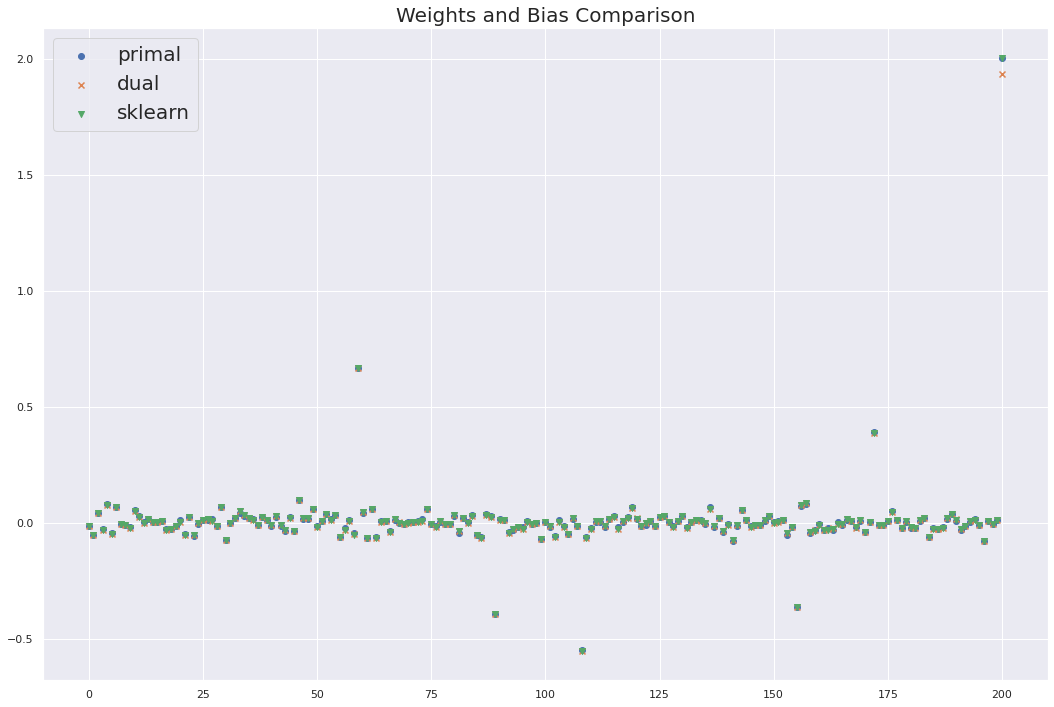

In [52]:
#plotting w and b

plt.figure(figsize=(18,12))
x = range(0,201)
plt.scatter(x, param_compare_1['primal'], alpha=1, label="primal")
plt.scatter(x, param_compare_1['dual'], alpha=1, marker = 'x', label="dual" )
plt.scatter(x, param_compare_1['sklearn'], alpha=1, marker = 'v', label="sklearn" )
plt.title('Weights and Bias Comparison', fontsize=20)
plt.legend(loc='upper left', prop={'size': 20})